In [1]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]


In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [6]:
mnb = MultinomialNB()

In [7]:
mnb.fit(X_train, y_train)

MultinomialNB()

In [8]:
y_pred = mnb.predict(X_test)

In [9]:
accuracy = accuracy_score(y_test, y_pred)
print("Test Seti Doğruluğu (Normalize edilmemiş veriler):", accuracy)

Test Seti Doğruluğu (Normalize edilmemiş veriler): 0.6363636363636364


In [10]:
conf_mx = confusion_matrix(y_test, y_pred)

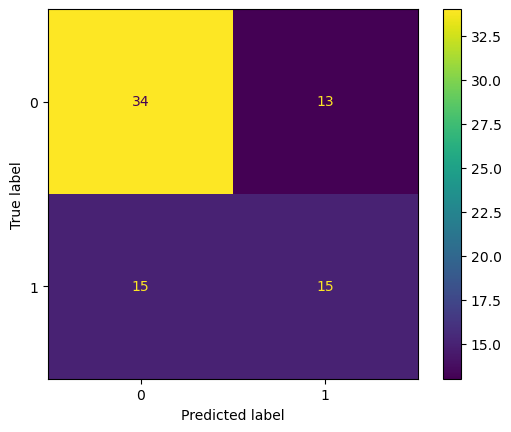

In [11]:
conf_mx_display = ConfusionMatrixDisplay(confusion_matrix=conf_mx)
conf_mx_display.plot()

In [12]:
params = {"alpha": [0.1, 0.5, 1.0, 2.0]}

In [13]:
grid_search = GridSearchCV(mnb, params, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 2.0]},
             return_train_score=True, scoring='accuracy')

In [14]:
best_params = grid_search.best_params_
print("\nEn iyi hiperparametreler:", best_params)


En iyi hiperparametreler: {'alpha': 0.1}


In [15]:
best_estimator = grid_search.best_estimator_

In [16]:
y_pred_tuned = best_estimator.predict(X_test)

In [17]:
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print("Tune edilmiş Test Seti Doğruluğu:", accuracy_tuned)

Tune edilmiş Test Seti Doğruluğu: 0.6363636363636364


In [18]:
conf_mx_tuned = confusion_matrix(y_test, y_pred_tuned)

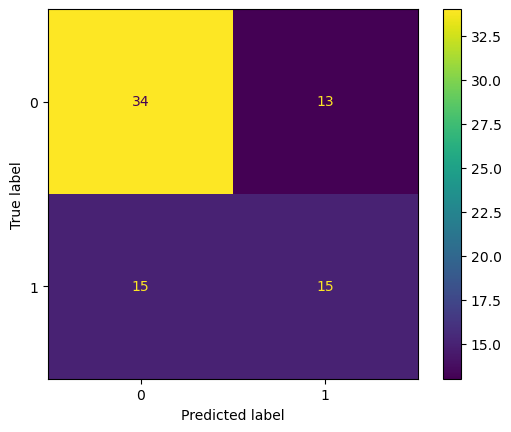

In [19]:
conf_mx_display_tuned = ConfusionMatrixDisplay(confusion_matrix=conf_mx_tuned)
conf_mx_display_tuned.plot()

In [20]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [22]:
df_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.10)

In [24]:
mnb.fit(X_train, y_train)

MultinomialNB()

In [25]:
y_pred = mnb.predict(X_test)

In [26]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.6363636363636364


In [27]:
conf_mx = confusion_matrix(y_test, y_pred)

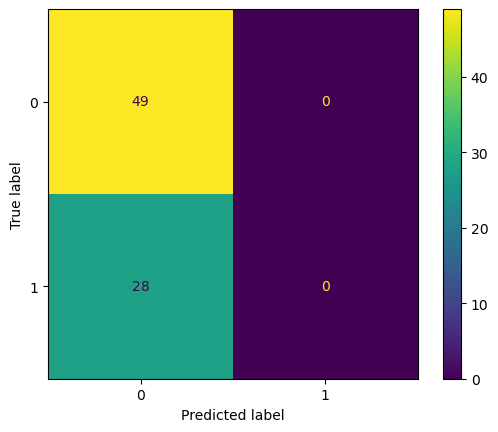

In [28]:
conf_mx_display = ConfusionMatrixDisplay(confusion_matrix=conf_mx)
conf_mx_display.plot()

In [29]:
params = {"alpha": [0.1, 0.5, 1.0, 2.0]}

In [30]:
grid_search = GridSearchCV(mnb, params, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 2.0]},
             return_train_score=True, scoring='accuracy')

In [31]:
best_params = grid_search.best_params_
print("\nEn iyi hiperparametreler:", best_params)


En iyi hiperparametreler: {'alpha': 0.1}


In [32]:
best_estimator = grid_search.best_estimator_

In [33]:
y_pred_tuned = best_estimator.predict(X_test)


In [34]:
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print("Tune edilmiş Test Seti Doğruluğu:", accuracy_tuned)


Tune edilmiş Test Seti Doğruluğu: 0.6363636363636364


In [35]:
conf_mx_tuned = confusion_matrix(y_test, y_pred_tuned)

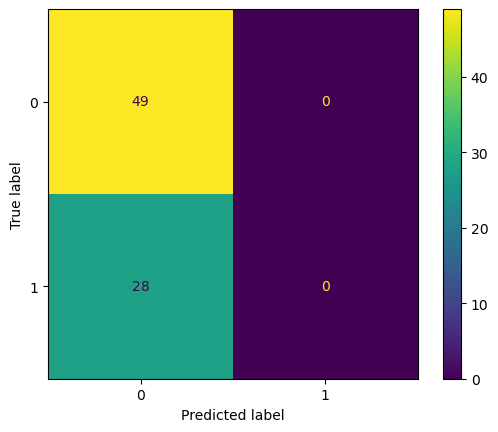

In [36]:
conf_mx_display = ConfusionMatrixDisplay(confusion_matrix=conf_mx_tuned)
conf_mx_display.plot()